<a href="https://colab.research.google.com/github/abhinsuresh/MLTSA_ASuresh/blob/master/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")


In [0]:
!pip install kaggle ;

#Data insgestion

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [6]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [0]:
!mkdir stock

In [8]:
cd stock

/content/gdrive/My Drive/stock


In [0]:
!mkdir data

In [9]:
cd data

/content/gdrive/My Drive/stock/data


In [0]:
#!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

 99% 488M/492M [00:03<00:00, 142MB/s]
100% 492M/492M [00:03<00:00, 134MB/s]


In [0]:
ls

price-volume-data-for-all-us-stocks-etfs.zip


In [0]:
#!unzip price-volume-data-for-all-us-stocks-etfs.zip

In [0]:
ls

Data/  ETFs/  price-volume-data-for-all-us-stocks-etfs.zip  Stocks/


In [10]:
cd Data

/content/gdrive/My Drive/stock/data/Data


In [0]:
ls

ETFs/  Stocks/


In [11]:
cd Stocks

/content/gdrive/My Drive/stock/data/Data/Stocks


In [12]:
import glob	
alltss = []
allfiles = np.sort(np.array(glob.glob("*.txt")))[:10]	

tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({
    "Close":allfiles[0].replace(".txt","")}, axis=1)

for f in allfiles[1:]:
    #print(f)
    name = f.replace(".txt","")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({
        "Close":name}, axis=1), on="Date")

tss.set_index("Date", inplace=True)
print ("shape of the dataset:", tss.shape)

shape of the dataset: (447, 10)


In [13]:
tss

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68
...,...,...,...,...,...,...,...,...,...,...
2017-11-02,68.130,47.460,81.00,70.51,10.02,47.257,88.00,3.6500,35.800,39.28
2017-11-03,68.370,47.120,80.99,70.23,10.08,47.346,80.40,3.6000,36.430,37.82
2017-11-07,68.250,46.970,81.00,72.22,11.07,46.358,81.00,3.4000,34.440,37.89


#Data visulization

> Indented block



In [0]:
for stocks in tss.columns:
  fig, ax = pl.subplots(figsize = (10, 4))
  ax.set_ylabel('USD')
  tss.plot(y = stocks, ax = ax, rot = 60)

Caption: Plotting the data showing the trend of stock with respect to date

#Scatter matrix

In [0]:
from pandas.plotting import scatter_matrix
#ax, fig = pl.subplots(1, figsize=(20,20))
#print(ax, fig)
scatter_matrix(tss, color="#222222", figsize=(18,18))
pl.savefig("dd.png")

Caption: This scattering matrix represents the data


# Correlation of data sets in table

In [16]:
tss.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


Caption: Describes the correlation of one data set with the other, the diagonal elements are one which is trivial since one data matches exactly with itself. The interesting thing to study here is how much a data/stocks is representative of another data.

The data 'aac.us' and 'aame.us' is only representative of each other, since we can see they have negative correlation with all others

#Visualizing the correlation

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


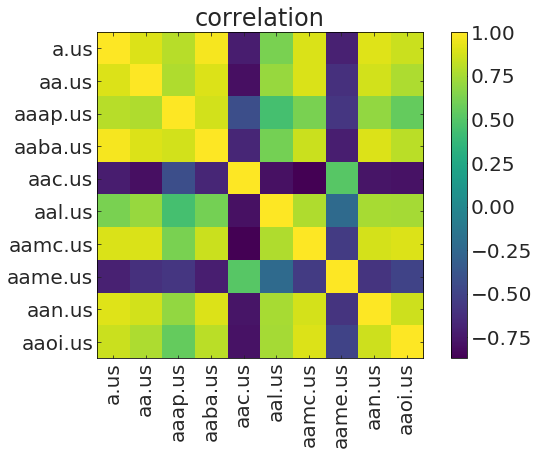

In [17]:
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);


Caption: This is another easy to read visual representation of the same data printed in the box above which indicates the strength of correlation and anticorrelation of data with each other and itself. Shades of blue represents anticorrelation whereas yellow and greenish shades represents correlated datas.

#Test for stationary data

In [18]:
threshold = 0.05
for c in tss.columns[:10]:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


Caption: the boolean condition shows weather the data set is stationary or not

#Autocorrelation and Partial Autocorrelation

In [0]:
import matplotlib.gridspec as gridspec
threshold = 0.05


gs = gridspec.GridSpec(10,3, hspace=0.8, wspace=0.3)

fig = pl.figure(figsize=(28,60))

for index,stocks in enumerate(tss.columns[:10]):

  if (sm.tsa.stattools.adfuller(tss[stocks])[1] < threshold):
    color = 'C3'
  else:
    color = 'C0'
  ax = pl.subplot(gs[index,0])
  ax.set_xlabel('Date')
  ax.set_ylabel('USD')
  tss.plot(y = stocks, ax = ax, rot = 60, color=color)
  ax = pl.subplot(gs[index,1])
  ax.set_xlabel('Lag')
  ax.set_ylabel('Correlation')
  plot_acf(tss[stocks], color = color, ax = ax, lags = 80);
  ax = pl.subplot(gs[index,2])
  ax.set_xlabel('Lag')
  ax.set_ylabel('Correlation')
  plot_pacf(tss[stocks], color = color, ax = ax, lags = 80);  

Caption: The autocorrelation represents how much is data correlated to itself. The shaded cone indicates confidence interval which is set to 95% by default. Looking at the autocorrealtion of the first data set 'a.us' we can see that the data is autocorrelated till a lag of around 40.

Partial autocorrelation is the autocorrelation at lag with correlations due to shorter time scales being removed. The confidence level of partial autocorrealtion is a small region which helps to indentify smaller correaltion with confidence.

For the stationary data alone the autocorrelation seems to be not monotonously decreasing. The partial autocorrelation we can see that most of line lies outside of confidence interval implying very less autocorrelation. Which can also be seen for some other data sets so the idea is not conclusive. Also for stationary 3 is a good guess for p value

# Fit one of the stationary time series with ARMA

#1, 2 and 3

In [56]:
# over the range of (0, 5) we are finding which set of parameters of p and q 
# gives best fit or least AIC
aic = pl.zeros((5,5))
import warnings
warnings.filterwarnings("ignore")
for p in range(5) :
  for q in range(5) :
    try :
      aic[p,q] = sm.tsa.ARMA(tss['aame.us'], (p,q)).fit(disp=False).aic
    except :
      pass

#printing the best fit parameters
print("best parameters: \n p = %s \n q = %s" %(pl.where(
    aic == pl.nanmin(aic))[0][0], np.where(aic == pl.nanmin(aic))[1][0]) )

#printing the AIC vlue for the best fit
print(sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit().aic)

best parameters: 
 p = 1 
 q = 1
-594.1149218798437


# 3.5

In [53]:
#now based on the previous output we print the fitting summary
mod = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 27 Feb 2020   AIC                           -594.115
Time:                        04:26:14   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

The best fit parameters according to the summary above are :
* constant $\mu$ : 3.9275 with uncertainty of 0.204 i.e. std err
* Auto Regressive(L1) $a_1$ 0.9811 with uncertainty of 0.010
* Moving Average(L1) $\theta_1$ -0.2706 with uncertainty of 0.049
* and the value of AIC is -594.115

$y(t) = \mu + \epsilon_t + a_1 y(t-1) + \theta_1 \epsilon_{t-1}$

This value tells us how strongly does the quantity at any time depends on previous time ranging from (t-1) to (t-p), where p is number of time steps, and q is number of past values on which the current value depends on. The constant gives you the average over the whole time series.

# Predict the future

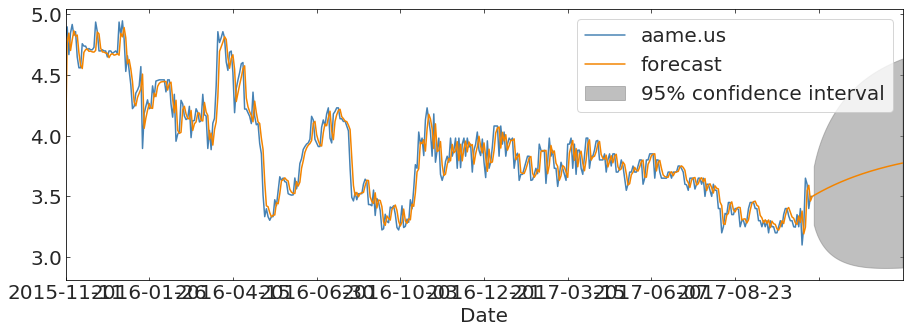

In [54]:
ax = tss[['aame.us']].plot(figsize=(15,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

Caption: prediction into the future with confidence level of 95%

# Choosing non-stationary time series

In [58]:
tss_new = tss.drop(columns='aame.us')

x_index = pl.where( abs(tss_new.corr()) == min( abs(tss_new.corr()).min() ))[0][0]
y_index = pl.where( abs(tss_new.corr()) == min( abs(tss_new.corr()).min() ))[0][1]

col1 = tss_new.columns[x_index]
col2 = tss_new.columns[y_index]
print( col1, col2)

aaap.us aac.us


In [0]:
cols = [col1, col2]
p = 5
q = 5
d = 5
aic_ns = pl.zeros((2, p, q, d))
aic_ns[:] = pl.nan

for (index, col) in enumerate(cols) :
    for i in range(p) :
        for j in range(q) :
                for k in range(d) :
                    try :
                        aic_ns[index, i,j,k] = sm.tsa.ARIMA(tss[[col]], (i,j,k)).fit(disp=False).aic
                    except :
                      pass
                        

In [72]:
p0,q0,d0 = pl.where(aic_ns[0] == pl.nanmin(aic_ns[0]))
p1,q1,d1 = pl.where(aic_ns[1] == pl.nanmin(aic_ns[1]))
print('For %s, the best parameters are \n p=%s \n q=%s \n d=%s' %(cols[0], p0[0],q0[0],d0[0]))
print('For %s, the best parameters are \n p=%s\n q=%s \n d=%s' %(cols[1],p1[0],q1[0],d1[0]))

For aaap.us, the best parameters are 
 p=2 
 q=2 
 d=4
For aac.us, the best parameters are 
 p=4
 q=1 
 d=3


In [74]:
arima_mod_0_c = sm.tsa.ARIMA(tss[[cols[0]]], (p0[0],q0[0],d0[0])).fit(disp=False, trend='c')
print(arima_mod_0_c.summary())

arima_mod_1_c = sm.tsa.ARIMA(tss[[cols[1]]], (p1[0],q1[0],d1[0])).fit(disp=False, trend='c')
print(arima_mod_1_c.summary())

                             ARIMA Model Results                              
Dep. Variable:             D2.aaap.us   No. Observations:                  445
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -714.719
Method:                       css-mle   S.D. of innovations              1.200
Date:                Thu, 27 Feb 2020   AIC                           1445.438
Time:                        04:54:51   BIC                           1478.222
Sample:                             2   HQIC                          1458.365
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0014      0.001      0.993      0.321      -0.001       0.004
ar.L1.D2.aaap.us    -1.2922      0.059    -21.753      0.000      -1.409      -1.176
ar.L2.D2.aaap.us    -0.9578 

In [46]:


#example of model output
arma_mod_11_c = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit(disp=False, trend='c')
arma_mod_11_nc = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit(disp=False, trend='nc')
#print(arma_mod_11.params)
#(df_f[col], (3,1), dates=df_f.index ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
print(arma_mod_11_c.summary())
print(arma_mod_11_nc.summary())



                              ARMA Model Results                              
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 27 Feb 2020   AIC                           -594.115
Time:                        03:46:14   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     

In [36]:

aics = pl.zeros((5,5))
for p in range(5):	
    for q in range(5):
            try:
                mod = sm.tsa.ARMA(tss['aame.us'], (p,1,q)).fit()  
                aics[p][q] = mod.aic
            except:
                aics[p][q] = pl.nan
p,q = pl.where(aic == pl.nanmin(aic))          
	
print("best parameters: p: {:d} q: {:d}".format(p[0],q[0]))

best parameters: p: 0 q: 0


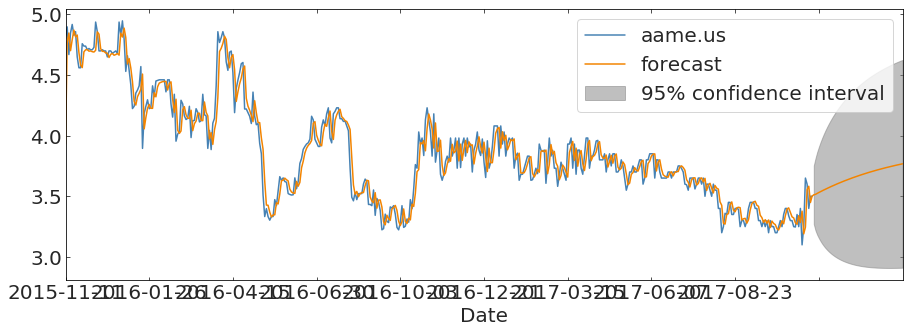

In [47]:
ax = tss[['aame.us']].plot(figsize=(15,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

In [0]:
pl.array([0,10,2])

array([ 0, 10,  2])